In [30]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
import game_of_life as gol
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

# Setting up video encoder paths
#ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
#plt.rcParams['animation.ffmpeg_path'] = ff_path
#if ff_path not in sys.path: sys.path.append(ff_path)

seed(32525252345)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
#importlib.reload(gol)

### Introduction

Jeff Conway’s Game of life is a cellular automata model that nicely demonstrates how complexity can emerge in a system with only a few simple rules. It is used for example in Richards Dawkins's book The Blind Watchmaker to support the argument that creation of complex organisms is possible without the need of Intelligent Designer. In this project I implemented Game of Life model in Python using Nympy and Scipy.

### Model

The world of game of life is a 2D grid which consisting of cells. These cells can have one of two states: they are alive or they are dead. Each game or simulation starts from an intial state called 'Seed', where some cells are set to be live and others are set to be dead. These can be easily implemented with numpy. We make a 2D array by choosing randomly if the value is 0 or 1 in each cell :

In [56]:
# this is will see the random number generator
np.random.seed(3534535)

Size=10
seed_array=np.random.choice([0, 1], size=(Size,Size))
seed_array

array([[1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 0, 0]])

With some matplitlib magic we can can plot the array as follows:

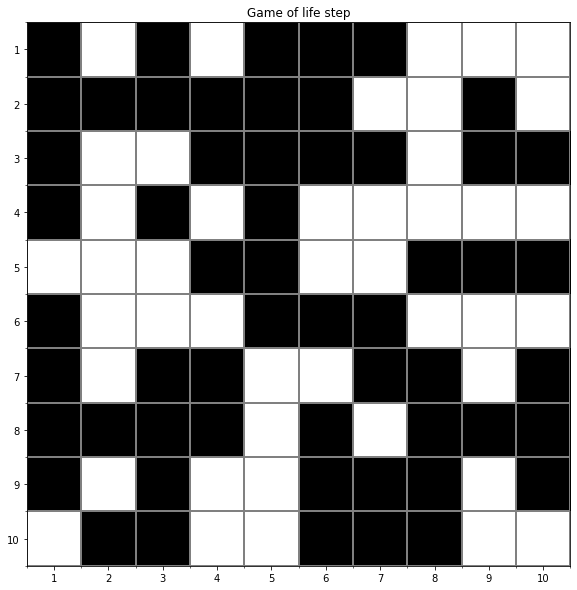

In [57]:
fig=gol.plot_step(seed_array)

The time dynamics come into play when we update the value of the cells with the following rules:
1.	Any live cell with two or three neighbors survives.
2.	Any dead cell with three live neighbors becomes a live cell.
3.	All other live cells die in the next generation. Similarly, all other dead cells stay dead.

Let's make a Game of life simulation of 100 steps with this seed:


In [58]:
game=gol.GameOfLife(seed_array)
steps=game.run(duration=100)

[[1 0 1 0 1 1 1 0 0 0]
 [1 1 1 1 1 1 0 0 1 0]
 [1 0 0 1 1 1 1 0 1 1]
 [1 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 1 1 1]
 [1 0 0 0 1 1 1 0 0 0]
 [1 0 1 1 0 0 1 1 0 1]
 [1 1 1 1 0 1 0 1 1 1]
 [1 0 1 0 0 1 1 1 0 1]
 [0 1 1 0 0 1 1 1 0 0]]


Animation shows what happens with these rules. Rendering can take some time.

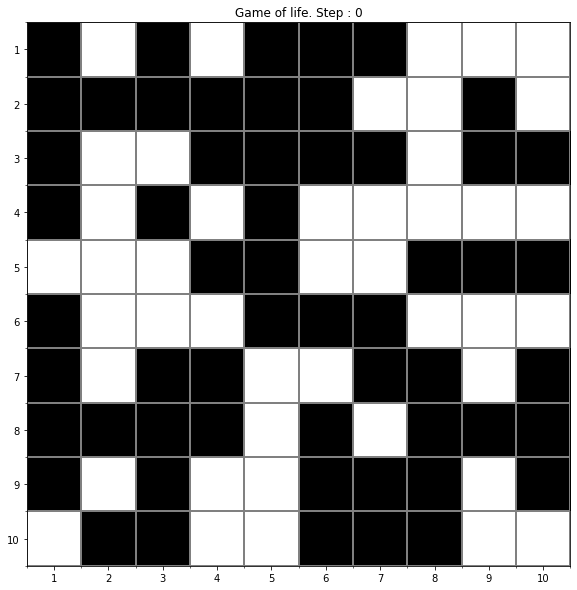

In [59]:
anim=gol.gol_animation(steps)
HTML(anim.to_html5_video())

Bigger simulation reveals more interesting patterns

[[1 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [1 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


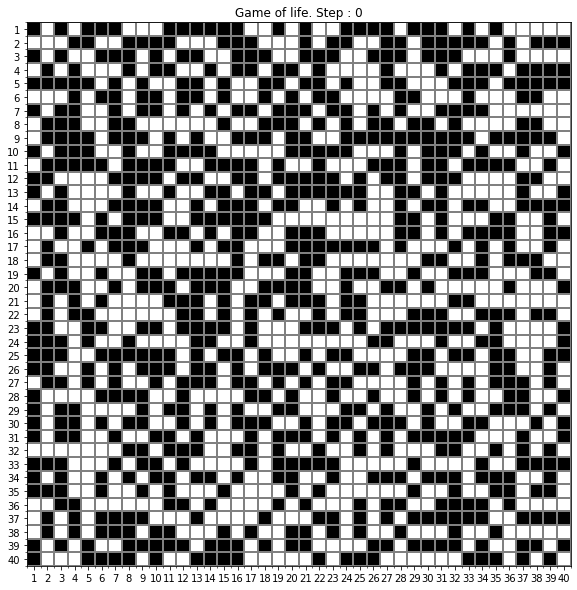

In [60]:
np.random.seed(3534535)
Size=40
seed_array=np.random.choice([0, 1], size=(Size,Size))
game=gol.GameOfLife(seed_array)
steps=game.run(duration=100)

anim=gol.gol_animation(steps)
HTML(anim.to_html5_video())

In [23]:
HTML(anim.to_html5_video())